# This is a sample notebook for pandas, an extremely powerful
# python module that allows for data I/O, plotting, and general
# data analysis

In [2]:
# As usual, first we import different packages:
#  - matplotlib to plot things
#  - numpy for numerical operations
#  - pandas

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
%matplotlib inline

In [5]:
# 1.  In this first example we create what is known as a pandas "data frame"
#    This is a way to organize data that is tabular in nature, i.e., rows 
#    and columns.
#
#    The syntax is ({ xxx }) where xxx contains the list (not in the python
#    sense) of data.  Each entry can be thought of as a row by column table.
#    the first row, or column headings, are listed first, then a colon (:),
#    then the row values in each column are listed between []'s.  The first
#    column is always an index.
#    The example below lists a table of people, their children and pets.

In [6]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

In [7]:
# To print out this data frame, just enter the DataFrame name

In [8]:
df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


In [9]:
# Alternately, specify certain columns by givin their name

In [10]:
df[['state', 'name']]

,state,name
0,california,john
1,dc,mary
2,california,peter
3,dc,jeff
4,california,bill
5,texas,lisa
6,texas,jose


In [11]:
# It's a little more tricky to display certain rows; for
# this use the "iloc" method, e.g., to display the third
# row fifth column (NOTE: python starts counting at 0,
# and the first column is an index not technically part
# of the DataFrame for these purposes)

In [12]:
df.iloc[3,5]

5

In [13]:
# search a column for a value, print out that row

In [14]:
df.loc[df['name']=='peter']

,name,age,gender,state,num_children,num_pets
2,peter,22,M,california,0,0


In [15]:
# search the table for values in a column, print 
# corresponding values in other column

In [16]:
df['name'].where(df['num_pets']>3)

0    john
1     NaN
2     NaN
3    jeff
4     NaN
5     NaN
6     NaN
Name: name, dtype: object

In [17]:
df.groupby('state')['name'].count()

state
california    3
dc            2
texas         2
Name: name, dtype: int64

In [18]:
# 2. Now we make some plots.  There are many ways to do this, including
#   both pandas and matplotlib.  Here we will plot one column against
#   another

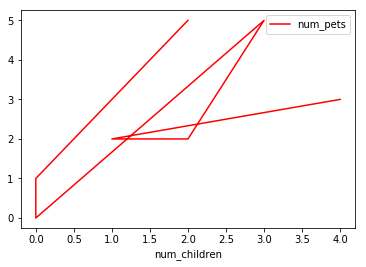

In [19]:
# plot num_children vs num_pets as line (doesn't really make sense)
df.plot(kind='line',x='num_children',y='num_pets',color='red')

In [20]:
# plot num_children vs num_pets as a scatter plot

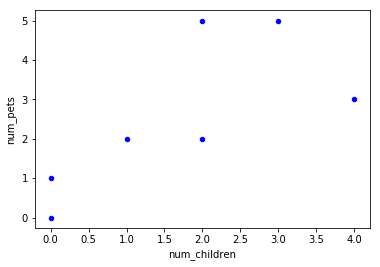

In [21]:
df.plot(kind='scatter',x='num_children',y='num_pets',color='blue')

In [22]:
# plot name vs age as bar chart (note we can do this even though
#  'name' is not a number since it's a bar chart)

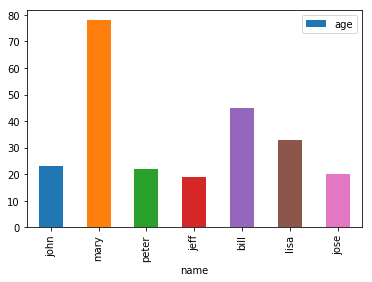

In [23]:
df.plot(kind='bar',x='name',y='age')

In [24]:
# now make a single plot with two lines
# This:
#
#df.plot(kind='line',x='name',y='num_children',color='blue')
#df.plot(kind='line',x='name',y='num_pets',color='red')
#
# would actually give two separate plots, one above the
# the other.  To out both on a single graph, we make use of
# some matplotlib functions

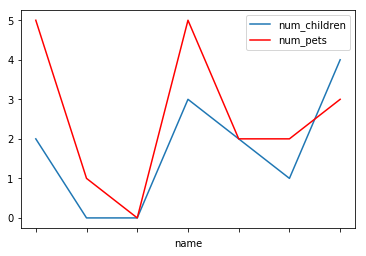

In [25]:
# a. clear the graph
plt.clf()

# b. use matplotlib "gca", or "get current axis"
ax = plt.gca()

# c. make two plots, and use the same axes
df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

In [26]:
# we can 

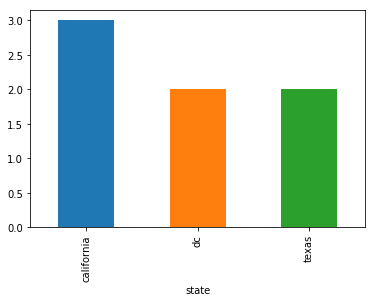

In [27]:
df.groupby('state')['name'].count().plot(kind='bar')

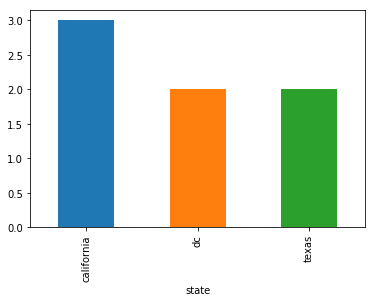

In [28]:
df.groupby('state').size().plot(kind='bar')

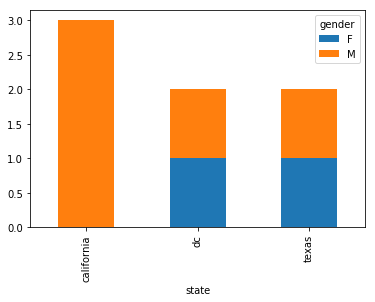

In [29]:
df.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

<Figure size 432x288 with 0 Axes>

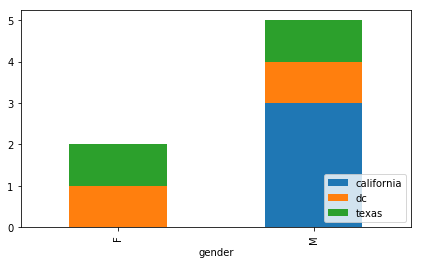

In [30]:
plt.clf()
df.groupby(['gender','state']).size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc='lower right')
plt.gcf().set_size_inches(7,4)
plt.show()

## plot histogram for a dataframe column

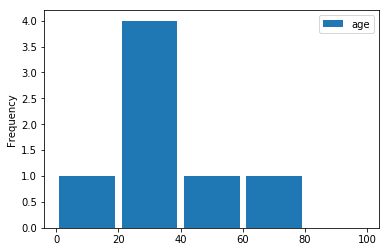

In [31]:
df[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.9,)

## percent single

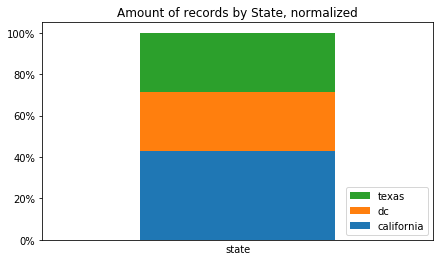

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(
 dummy = 1   
).groupby(['dummy','state']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)


plt.title('Amount of records by State, normalized')


# other it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['state'].unique())

plt.legend(reversed_handles,labels,loc='lower right')

plt.gcf().set_size_inches(7,4)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## percent, two-level group by

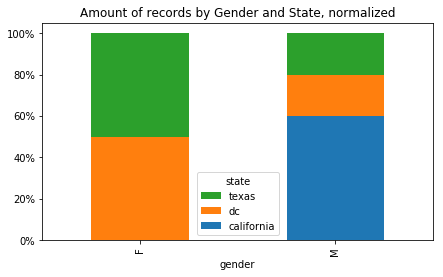

In [33]:
import matplotlib.ticker as mtick

df.groupby(['gender','state']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,legend='reverse')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Amount of records by Gender and State, normalized')
# plt.legend(loc='lower right')
plt.gcf().set_size_inches(7,4)
plt.show()

### date histograms

In [34]:
df = pd.DataFrame({
    'name':['john','lisa','peter','carl','linda','betty'],
    'date_of_birth':[
        '01/21/1988','03/10/1977','07/25/1999','01/22/1977','09/30/1968','09/15/1970'
    ]
})

df

,name,date_of_birth
0,john,01/21/1988
1,lisa,03/10/1977
2,peter,07/25/1999
3,carl,01/22/1977
4,linda,09/30/1968
5,betty,09/15/1970


In [35]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'],infer_datetime_format=True)
df

,name,date_of_birth
0,john,1988-01-21
1,lisa,1977-03-10
2,peter,1999-07-25
3,carl,1977-01-22
4,linda,1968-09-30
5,betty,1970-09-15


In [36]:
df.dtypes

name                     object
date_of_birth    datetime64[ns]
dtype: object

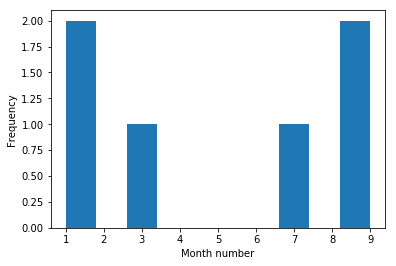

In [37]:
plt.clf()
df['date_of_birth'].map(lambda d: d.month).plot(kind='hist')
plt.xlabel('Month number')
plt.show()

# Now try dates

In [38]:
# import modules
from datetime import datetime
from dateutil.parser import parse
import pandas as pd

In [39]:
# Create string variable and convert to datetime format
war_start = '2011-01-03'
datetime.strptime(war_start, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [40]:
# create a list of string variables and convert to datetime format
attack_dates = ['7/2/2011', '8/6/2012', '11/13/2013', '5/26/2011', '5/2/2001']
[datetime.strptime(x, '%m/%d/%Y') for x in attack_dates]

[datetime.datetime(2011, 7, 2, 0, 0),
 datetime.datetime(2012, 8, 6, 0, 0),
 datetime.datetime(2013, 11, 13, 0, 0),
 datetime.datetime(2011, 5, 26, 0, 0),
 datetime.datetime(2001, 5, 2, 0, 0)]

In [41]:
# Use parse() to attempt to auto-convert common string formats
parse(war_start)

datetime.datetime(2011, 1, 3, 0, 0)

In [42]:
# Use parse() on every element of the attack_dates string
[parse(x) for x in attack_dates]

[datetime.datetime(2011, 7, 2, 0, 0),
 datetime.datetime(2012, 8, 6, 0, 0),
 datetime.datetime(2013, 11, 13, 0, 0),
 datetime.datetime(2011, 5, 26, 0, 0),
 datetime.datetime(2001, 5, 2, 0, 0)]

In [43]:
# Use parse, but designate that the day is first
parse(war_start, dayfirst=True)

datetime.datetime(2011, 3, 1, 0, 0)

In [44]:
# Create a dataframe

data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994', '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109', '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877'],
        'value': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
df = pd.DataFrame(data, columns = ['date', 'value'])
print(df)

                         date  value
0  2014-05-01 18:47:05.069722      1
1  2014-05-01 18:47:05.119994      1
2  2014-05-02 18:47:05.178768      1
3  2014-05-02 18:47:05.230071      1
4  2014-05-02 18:47:05.230071      1
5  2014-05-02 18:47:05.280592      1
6  2014-05-03 18:47:05.332662      1
7  2014-05-03 18:47:05.385109      1
8  2014-05-04 18:47:05.436523      1
9  2014-05-04 18:47:05.486877      1


In [45]:
# Convert df['date'] from string to datetime
pd.to_datetime(df['date'])

0   2014-05-01 18:47:05.069722
1   2014-05-01 18:47:05.119994
2   2014-05-02 18:47:05.178768
3   2014-05-02 18:47:05.230071
4   2014-05-02 18:47:05.230071
5   2014-05-02 18:47:05.280592
6   2014-05-03 18:47:05.332662
7   2014-05-03 18:47:05.385109
8   2014-05-04 18:47:05.436523
9   2014-05-04 18:47:05.486877
Name: date, dtype: datetime64[ns]